# Arbitrary value imputation
Imputation is the act of replacing missing data with statistical estimates of the missing values.

### Which variables can we impute with an arbitrary value?
Both categorical and numerical variables can be imputed by arbitrary values.

### Assumptions
Data is not missing at random.

### Advantages
Easy to implement
Fast way of obtaining complete datasets
Can be integrated in production (during model deployment)
Captures the importance of "missingness" if there is one
### Limitations
Distortion of the original variable distribution
Distortion of the original variance
Distortion of the covariance with the remaining variables of the dataset
If the arbitrary value is at the end of the distribution it may mask or create outliers
Need to be careful not to chose an arbitrary value too similar to the mean or median (or any other common value of the variable distribution)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
#load dataset
df = pd.read_csv('titanic.csv')
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [9]:
# let's look at the percentage of missing values

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

## Imputation important
Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [10]:
# Let's explore the missing data in the train set ,the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [11]:
# lets create a func to impute arbitrary value

def impute_arb(df, var, value):

    return df[var].fillna(value)

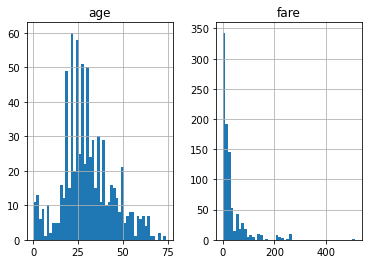

In [12]:
# let's explore the distribution of the variables
# to decide which arbitrary value to use

X_train.hist(bins=50)
plt.show()

In [16]:
# first replace with 100
X_train['Age_100'] = impute_arb(X_train, 'age', 100)

# now replace with -10
X_train['Age_minus10'] = impute_arb(X_train, 'age', -10)

X_train.head(15)

,age,fare,Age_100,Age_minus10
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,100.0,-10.0
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,100.0,-10.0
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


In [17]:
# we can see a change in the variance after arbitrary value imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print('Original variable variance: ', X_train['age'].var())
print('Variance after 100 imputation: ', X_train['Age_100'].var())
print('Variance after -10 imputation: ', X_train['Age_minus10'].var())

Original variable variance:  194.16304666581854
Variance after 100 imputation:  910.1393272780734
Variance after -10 imputation:  407.44914425375975


In fact, the effect on the variance will also be driven by the magnitude of the arbitrary value selected for the imputation

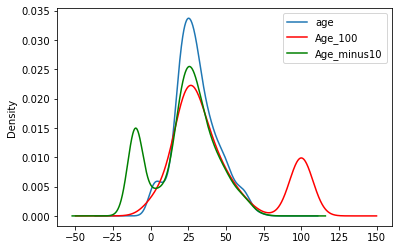

In [18]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with 99
X_train['Age_100'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
X_train['Age_minus10'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, arbitrary value imputation distorts the original distribution of the variable Age. The transformed variable shows more values around arbitrary values.

### Is this important?

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Arbitrary value imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

On the other hand, this technique works quite well with tree based algorithms.

In [20]:
# we also said that arbitrary value imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

X_train[['fare', 'age', 'Age_100', 'Age_minus10']].cov()

,fare,age,Age_100,Age_minus10
fare,2248.326729,136.176223,-40.886560,197.214921
age,136.176223,194.163047,194.163047,194.163047
Age_100,-40.886560,194.163047,910.139327,-277.247177
Age_minus10,197.214921,194.163047,-277.247177,407.449144


<AxesSubplot:>

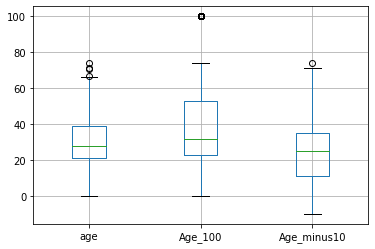

In [21]:
# Finally, we mentioned that arbitrary value imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[['age', 'Age_100', 'Age_minus10']].boxplot()

We can see that adding values at the end of the distribution mask entirely values that were outliers in the original distribution.